In [1]:
from load_config import load_config
from utils import model_from_config, load_newest
from plotting.plotting import compare, make_visual
from evaluator import Evaluator
from datasets.preprocessor import Preprocessor_2p5D
import torch
from torchsummary import summary
import numpy as np

device='cuda'

In [2]:
config = load_config()
checkpoints_path = config['checkpoint_dir']

In [3]:
net = model_from_config(config).to(device)

In [4]:
model_parameters = filter(lambda p: p.requires_grad, net.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print(f"{params:,}")

906,204


In [5]:
net = load_newest(checkpoints_path, net, device)

In [6]:
evaluator = Evaluator(config, net, device=device)

In [7]:
pre = Preprocessor_2p5D(config)

In [16]:
dp = pre.process(50)
vol, seg = dp.full_vol, dp.full_seg
pred = evaluator.evaluate(vol)

batch.shape=torch.Size([33, 3, 512, 512])
batch.shape=torch.Size([33, 3, 512, 512])
batch.shape=torch.Size([33, 3, 512, 512])
batch.shape=torch.Size([33, 3, 512, 512])
batch.shape=torch.Size([33, 3, 512, 512])
batch.shape=torch.Size([33, 3, 512, 512])
batch.shape=torch.Size([33, 3, 512, 512])
batch.shape=torch.Size([7, 3, 512, 512])


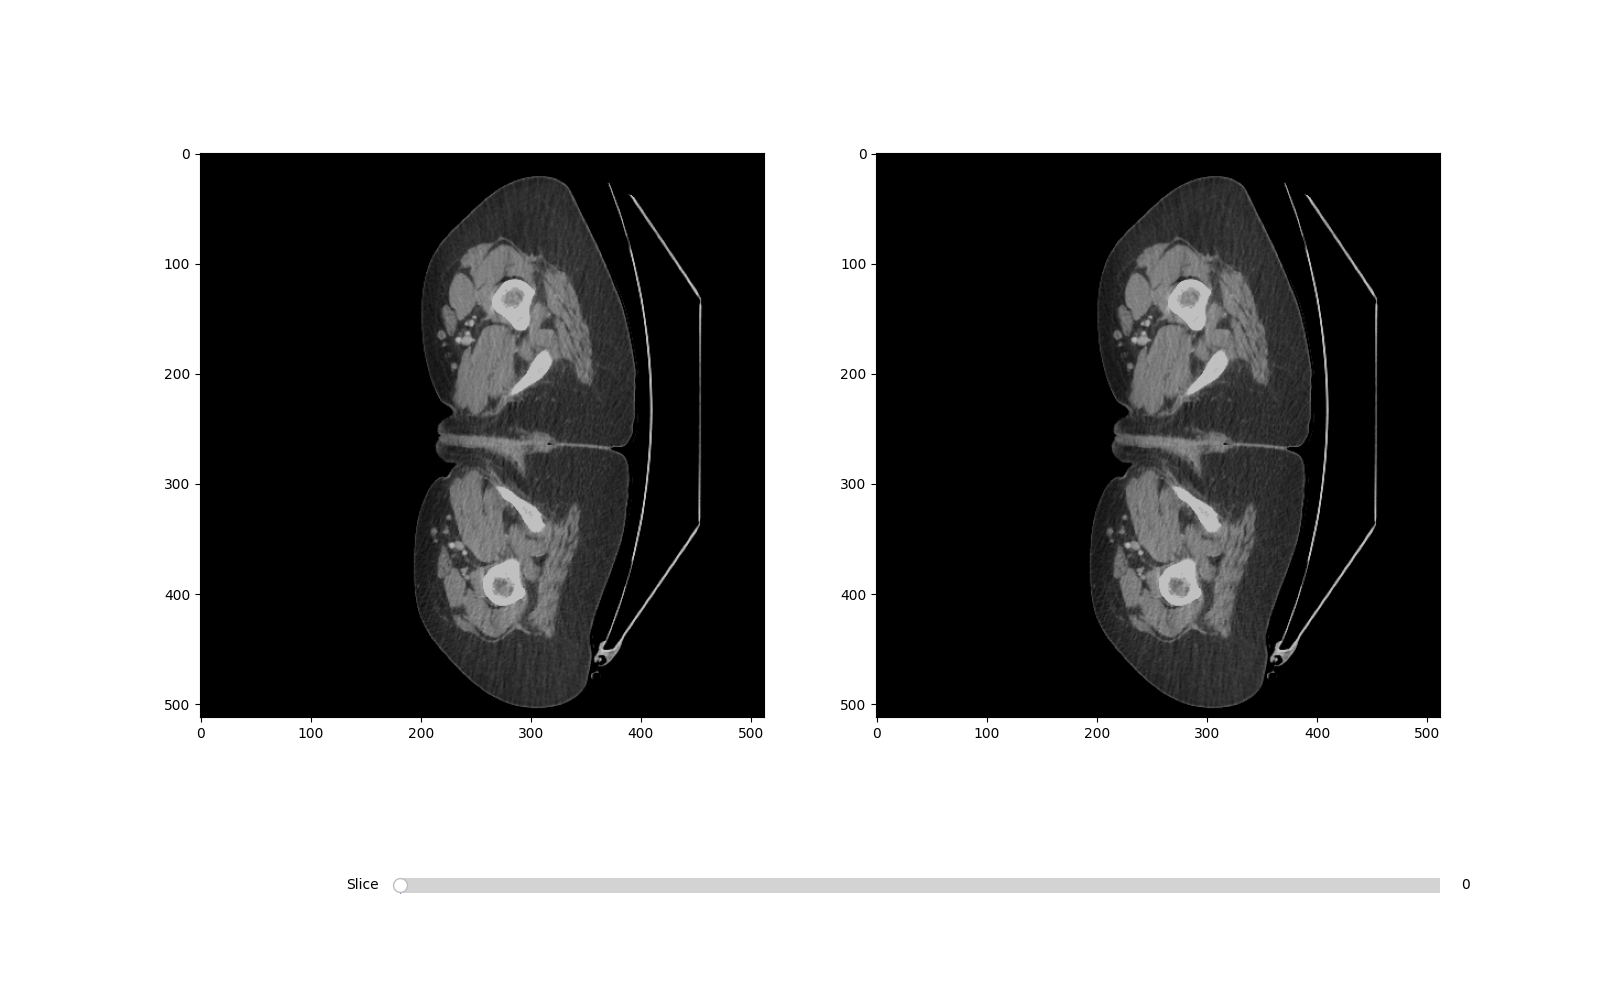

In [17]:
%matplotlib ipympl
slider = compare(vol, seg, pred)